In [9]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)


In [12]:


df[['job_title_short', 'job_skills']].head(5)



,job_title_short,job_skills
0,Senior Data Engineer,None
1,Data Analyst,"[r, python, sql, nosql, power bi, tableau]"
2,Data Engineer,"[python, sql, c#, azure, airflow, dax, docker,..."
3,Data Engineer,"[python, c++, java, matlab, aws, tensorflow, k..."
4,Data Engineer,"[bash, python, oracle, aws, ansible, puppet, j..."


<Axes: xlabel='job_skills'>

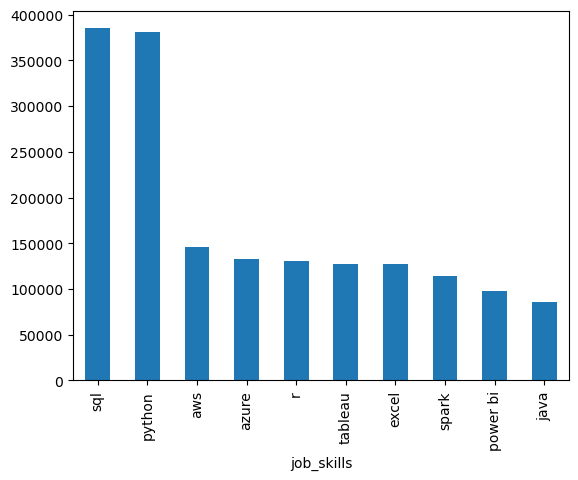

In [ ]:
df_boom = df.explode("job_skills")



In [25]:
skills_count = df_boom.groupby(["job_skills","job_title_short"]).size()

In [40]:
data_of_skills = skills_count.reset_index(name = "skill_count")

data_of_skills = data_of_skills.sort_values(by = "skill_count", ascending = False)

data_of_skills

,job_skills,job_title_short,skill_count
1480,python,Data Scientist,113711
1822,sql,Data Engineer,113130
1479,python,Data Engineer,108022
1821,sql,Data Analyst,92428
1823,sql,Data Scientist,78982
...,...,...,...
2173,webex,Senior Data Scientist,1
1054,mattermost,Data Scientist,1
270,clickup,Machine Learning Engineer,1
797,heroku,Senior Data Analyst,1


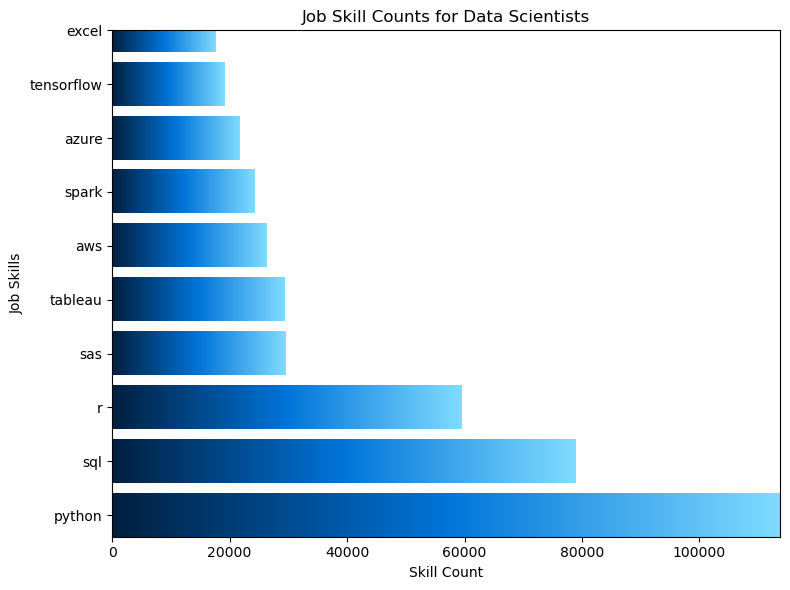

In [51]:
job_title = "Data Scientist"

top_skills = 10 

import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors

# Sort data for clean layout (optional)
final_df = final_df.sort_values("skill_count")

# Custom blue gradient
cmap = mcolors.LinearSegmentedColormap.from_list(
    "custom_blue", ["#001f3f", "#0074D9", "#7FDBFF"]  # dark → light blue
)

fig, ax = plt.subplots(figsize=(8, 6))

# Loop through each bar and draw a gradient rectangle
for i, (skill, count) in enumerate(zip(final_df["job_skills"], final_df["skill_count"])):
    # Create a gradient image (horizontal from 0 → 1)
    grad = np.linspace(0, 1, 256).reshape(1, -1)
    ax.imshow(
        grad,
        extent=[0, count, i - 0.4, i + 0.4],  # x: bar length, y: bar height
        aspect="auto",
        cmap=cmap
    )

# Axis labels and aesthetics
ax.set_yticks(range(len(final_df)))
ax.set_yticklabels(final_df["job_skills"])
ax.invert_yaxis()
ax.set_xlabel("Skill Count")
ax.set_ylabel("Job Skills")
ax.set_title("Job Skill Counts for Data Scientists")

plt.tight_layout()
plt.show()